# Final Project - Travel Insurance Prediction

Luh Devany <br>
Fadhrizal Hafidi <br>
M Miftah Thaha <br>
Ghislaine Dwiani <br>
Irfan Muhamad <br>
Winda Pebriyanti <br>
Raditya Angkasa <br>
Alvito Farandy <br>
Ericson P.M SIlalahi 

In [ ]:
!gdown --id 1Hrzb8-td5D0P4GLks3QBtzkCUzpszzP3

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hrzb8-td5D0P4GLks3QBtzkCUzpszzP3
To: /content/TravelInsurancePrediction.csv
100% 115k/115k [00:00<00:00, 63.1MB/s]


In [ ]:
#Data manipulation

import pandas as pd
import numpy as np

#Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Warning

import warnings 
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sidetable as stb

# Load Dataset

In [ ]:
df = pd.read_csv('/content/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Descriptive Statistic

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


* Tipe data pada setiap kolom sudah sesuai, nama kolom dengan isi datanya sudah sesuai namun pada salah satu kolom yang ada perlu dilakukan beberapa penyesuaian

In [ ]:
df.isnull().sum() #checking missing value

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}') #mencari unique value

columns and number of unique values
Unnamed: 0 -> 1987
Age -> 11
Employment Type -> 2
GraduateOrNot -> 2
AnnualIncome -> 30
FamilyMembers -> 8
ChronicDiseases -> 2
FrequentFlyer -> 2
EverTravelledAbroad -> 2
TravelInsurance -> 2


In [ ]:
#Apa saja unique valuesnya
for i in df.columns:
    print(i,"column's unique values are:",df[i].unique())

Unnamed: 0 column's unique values are: [   0    1    2 ... 1984 1985 1986]
Age column's unique values are: [31 34 28 25 33 26 32 29 35 30 27]
Employment Type column's unique values are: ['Government Sector' 'Private Sector/Self Employed']
GraduateOrNot column's unique values are: ['Yes' 'No']
AnnualIncome column's unique values are: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
FamilyMembers column's unique values are: [6 7 4 3 8 9 5 2]
ChronicDiseases column's unique values are: [1 0]
FrequentFlyer column's unique values are: ['No' 'Yes']
EverTravelledAbroad column's unique values are: ['No' 'Yes']
TravelInsurance column's unique values are: [0 1]


**Hasil:**
- Tidak ada data yang memiliki nilai null
- Semua tipe data sudah sesuai, namun perlu penyesuaian pada EDA dan Pre-Processing untuk Modelling
- Nilai unik pada kolom juga tidak memiliki suatu kejanggalan

Akan dilakukan penyesuaian dengan menghapus kolom "Unnamed" karena merupakan suatu index utk kolom.

In [ ]:
df = df.drop('Unnamed: 0' , axis = 1) 
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [ ]:
#untuk mempermudah pemahaman, kolom yang bernilai 0 dan 1 akan diubah menjadi yes untuk 1 dan no untuk 0

df["TravelInsurance"] = df["TravelInsurance"].map({0: "No", 1: "Yes"})
df["ChronicDiseases"] = df["ChronicDiseases"].map({0: "No", 1: "Yes"})

In [ ]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Yes
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,No,Yes,Yes,Yes
1983,28,Private Sector/Self Employed,Yes,1750000,5,Yes,No,Yes,No
1984,28,Private Sector/Self Employed,Yes,1150000,6,Yes,No,No,No
1985,34,Private Sector/Self Employed,Yes,1000000,6,No,Yes,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   object
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   object
dtypes: int64(3), object(6)
memory usage: 139.8+ KB


In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


#Descriptive Statistic

In [ ]:
df.describe(include = ['object'])

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


Secara keseluruhan tidak ada variable yang memiliki anomali maupun dominasi yang berlebih di antara tiap unique nilai terhadap analisa descriptive statistiknya.

In [ ]:
num = df.select_dtypes(include=[np.number]) #separating categorical and numerical column
cat = df.select_dtypes(exclude=[np.number])

numerical = num.columns
categorical = cat.columns

print(numerical)
print(categorical)

Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')
Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')


In [ ]:
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


Catatan <br>
- ketiga kolom (Age, Annual Income, Family Members) memiliki persebaran data yang sama. <br>
- seluruh kolom tidak memiliki perbedaan yang signifikan antara mean/median dengan max.

In [ ]:
df[categorical].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


In [ ]:
df[numerical].mode()

,Age,AnnualIncome,FamilyMembers
0,28,800000,4


Dari informasi diatas, diperoleh : <br>
- usia client yang paling banyak yaitu berada pada usia 28 tahun
- Annual Income terbanyak berjumlah $800000
- Jumlah Family members yang sering muncul adalah 4 

In [ ]:
for col in numerical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Age:
28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: Age, dtype: int64

Value count kolom AnnualIncome:
800000     153
500000     143
1400000    130
1200000    112
1100000    107
600000      98
700000      95
1300000     91
300000      88
1500000     82
1050000     82
550000      81
1150000     79
900000      72
1250000     71
750000      65
400000      65
1000000     60
350000      55
850000      55
1350000     43
1700000     37
1450000     31
650000      30
950000      21
1750000     15
450000      15
1550000      5
1800000      4
1650000      2
Name: AnnualIncome, dtype: int64

Value count kolom FamilyMembers:
4    505
5    426
3    377
6    294
7    178
2     93
8     59
9     55
Name: FamilyMembers, dtype: int64



In [ ]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Employment Type:
Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Value count kolom GraduateOrNot:
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64

Value count kolom ChronicDiseases:
No     1435
Yes     552
Name: ChronicDiseases, dtype: int64

Value count kolom FrequentFlyer:
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

Value count kolom EverTravelledAbroad:
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64

Value count kolom TravelInsurance:
No     1277
Yes     710
Name: TravelInsurance, dtype: int64



In [ ]:
df['TravelInsurance'].value_counts(normalize=True)

No     0.642677
Yes    0.357323
Name: TravelInsurance, dtype: float64

- fitur target (Travel Insurance) sebagai dasar utk memprediksi pembelian paket travel insurance baru memiliki 2 fitur (yes/no)

In [ ]:
df.duplicated().sum() #mencari data duplikat

738

# Univariate Analysis

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). <br>

Tuliskan hasil observasinya( univariate analysis), misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).  <br> 

Jelaskan juga apa yang harus di-follow up saat data pre-processing

**A. individual displot analysis (numerical)**

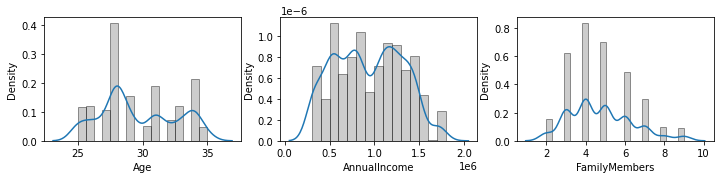

In [ ]:
features = numerical 
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.distplot(df[features[i]],
                 hist_kws={'color' : 'gray', 'edgecolor' : "black"})

In [ ]:
#skewness value 
for i in range(0, len(numerical)): print(f"Skewness {df[numerical].columns[i]} : {df[numerical[i]].skew()}")

Skewness Age : 0.23962475139295264
Skewness AnnualIncome : 0.07841699043593056
Skewness FamilyMembers : 0.5611969123054563


**Insight Displot** <br>
Dari nilai skewness pada visualisasi data diatas dapat disimpulkan bahwa : <br>
- Dari nilai skewness dan visualisasi di atas dapat dikatakan bahwa tipe data numerikal memiliki pola persebaran datanya adalah positif. <br>
- Lonjakan pada gambar diatas menunjukkan jumlah yang paling dominan untuk setiap data.

**B. individual boxplot analysis (numerical)**

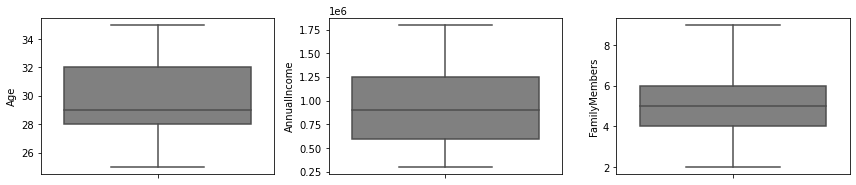

In [ ]:
features = numerical
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='gray')
    plt.tight_layout()

**Insight Boxplot** : Pada grafik boxplot, terlihat seluruh fitur tidak memiliki outlier, yaitu nilai ekstrem yang melewati nilai limit tertinggi dan terendah dari suatu fitur.

**C. Violin Plot (Numerical)**

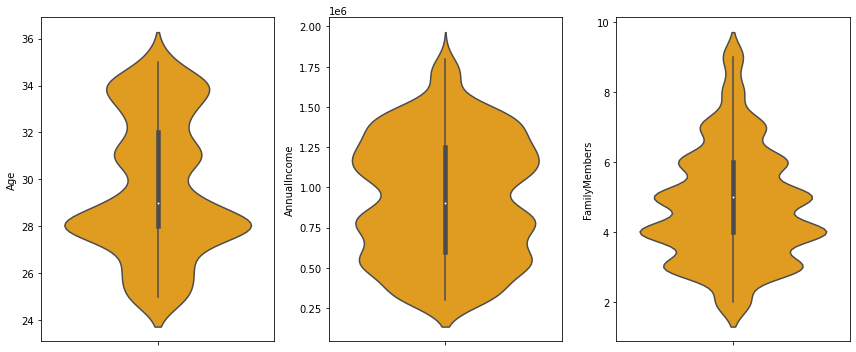

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='orange', orient='v')
    plt.tight_layout()

**Insight Violin Plot** : seluruh kolom memiliki distribusi yang merata.

**D. Barplot (Categorical)**

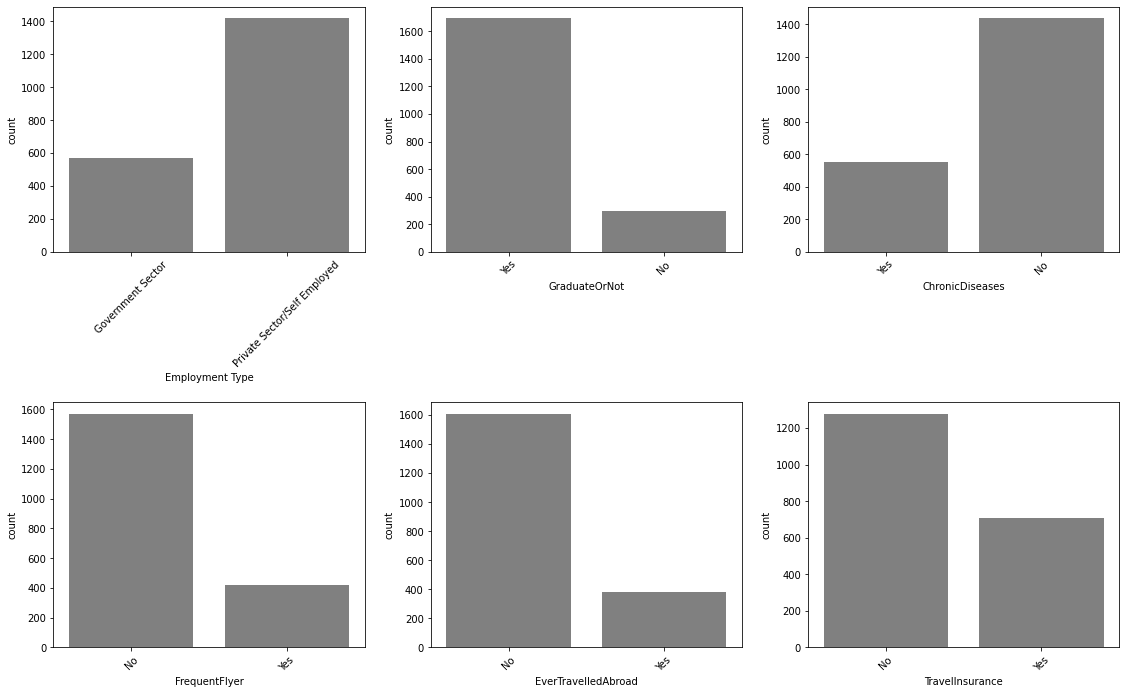

In [ ]:
# Countplot untuk melihat persebaran data variabel categorical 
plt.figure(figsize=(16,10))
for i in range (0, len(categorical[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[categorical[0:][i]], color='gray', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

In [ ]:
df.stb.freq(['Employment Type'], cum_cols=False)

,Employment Type,count,percent
0,Private Sector/Self Employed,1417,71.313538
1,Government Sector,570,28.686462


In [ ]:
df.stb.freq(['GraduateOrNot'], cum_cols=False)

,GraduateOrNot,count,percent
0,Yes,1692,85.153498
1,No,295,14.846502


In [ ]:
df.stb.freq(['ChronicDiseases'], cum_cols=False)

,ChronicDiseases,count,percent
0,No,1435,72.219426
1,Yes,552,27.780574


In [ ]:
df.stb.freq(['FrequentFlyer'], cum_cols=False)

,FrequentFlyer,count,percent
0,No,1570,79.013588
1,Yes,417,20.986412


In [ ]:
df.stb.freq(['EverTravelledAbroad'], cum_cols=False)

,EverTravelledAbroad,count,percent
0,No,1607,80.875692
1,Yes,380,19.124308


In [ ]:
df.stb.freq(['TravelInsurance'], cum_cols=False)

,TravelInsurance,count,percent
0,No,1277,64.26774
1,Yes,710,35.73226


Berdasarkan barplot di atas diperoleh kesimpulan keseluruhan data kategorik historikal klien yaitu: <br>

- klien yang terbanyak berprofesi sebagai private sector employee (71.3%) <br>
- klien dengan status sudah lulus bangku universitas merupakan klien yang terbanyak (85.1%) <br>
- klient yang tidak memiliki penyakit kronis (chronic disease) (72.2%) lebih banyak daripada yang memiliki penyakit kronis (27.7%) <br>
- klien dengan status "Frequent Flyer" lebih sedikit (79.01%) <br>
- Klien yang tidak pernah berpergian ke luar negeri (ever travelled abroad) lebih tinggi (80.8%)
dibanding yang pernah berpergian (19.1%) <br>
- hasil dari penawaran Travel Insurance sebelumnya pada tahap awal yang paling banyak adalah "No" (64.2%)

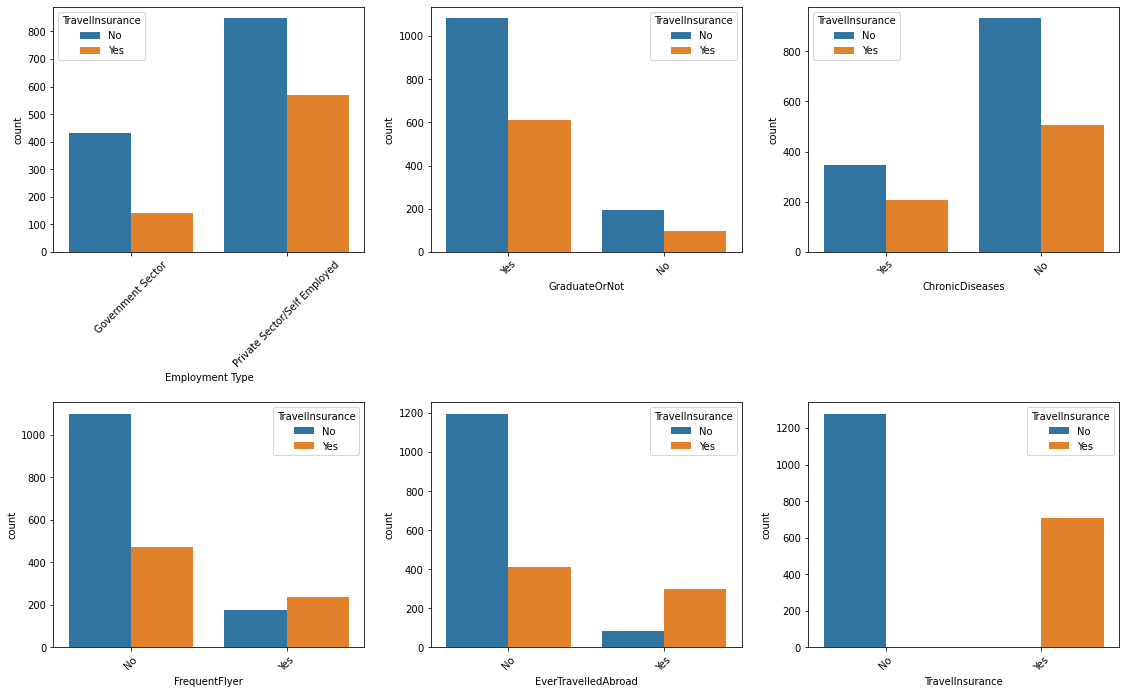

In [ ]:
# Countplot dengan meng-highlight "TravelInsurance" sebagai variabel target
plt.figure(figsize=(16,10))
for i in range (0, len(categorical[0:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=df[categorical[0:][i]], hue='TravelInsurance', orient='h')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout(pad=2)

**Yang perlu di follow up :** Persebaran pelanggan yang membeli Travel Insurance pada tahap awal masih sangat kecil dibanding pelanggan yang belum membeli Travel Insurance. Perlu dilakukan analisa korelasi antara variable numerikal & kategorikal untuk melihat variabel apa yang mempengaruhi tingkat pembelian selanjutnya.

<Figure size 576x432 with 0 Axes>

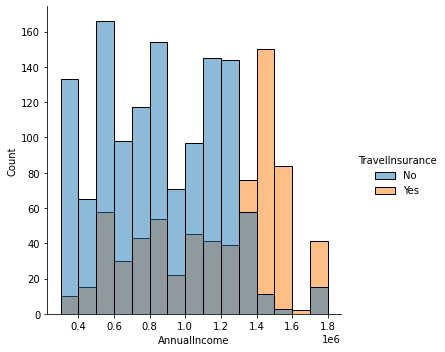

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=df, x="AnnualIncome",hue='TravelInsurance')

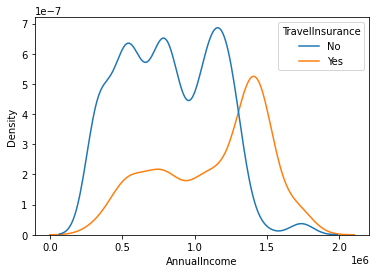

In [ ]:
sns.kdeplot(data=df, x="AnnualIncome",hue='TravelInsurance')

Jika dilihat dari Annual Income diatas 1,3 million, lebih banyak yang membeli travel insurance dibandingkan dengan yang tidak membeli travel insurance.

# Multivariate Analysis


Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti: <br> 

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana <br> 
saja yang paling relevan dan harus dipertahankan?
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu? <br> 

* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi <br> 



```
# This is formatted as code
```

**Correlation Heatmap (Numeric)**

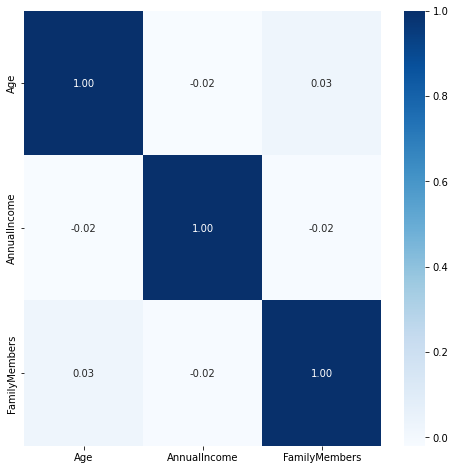

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat dari heatmap diatas bahwa tidak ada feature yang berkorelasi dengan kuat yang berarti tidak ada feature yang redundant.

**Pairplot (numeric)**

<Figure size 1080x1080 with 0 Axes>

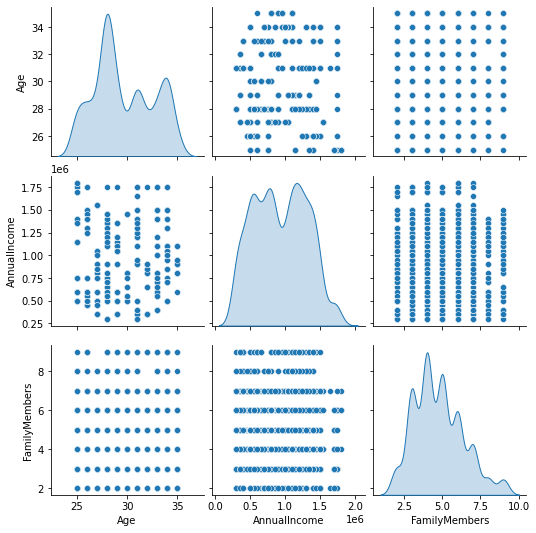

In [ ]:
#Tanpa hue dan regresi
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde')

<Figure size 1080x1080 with 0 Axes>

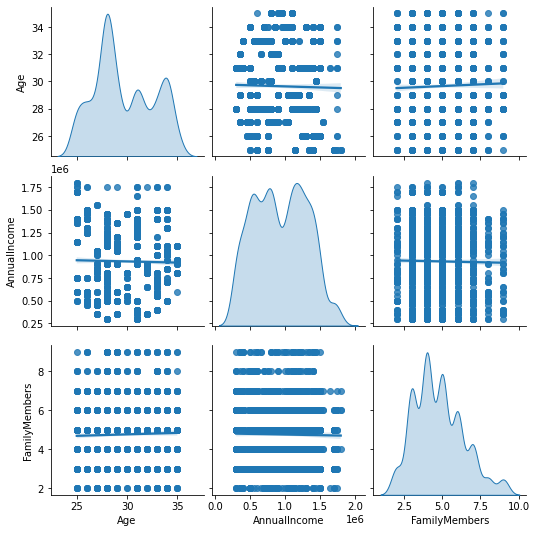

In [ ]:
#Menggunakan plot regresi tanpa hue
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', kind='reg')

<Figure size 1080x1080 with 0 Axes>

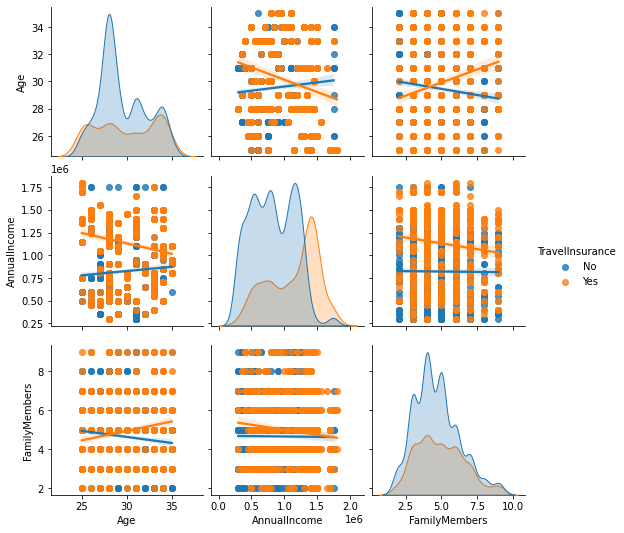

In [ ]:
#Pakai hue dan plot regresi
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', kind='reg', hue='TravelInsurance')

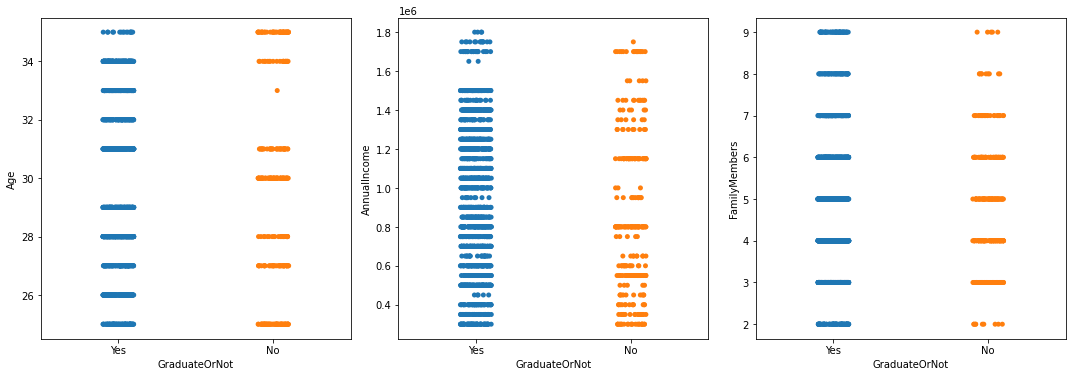

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='GraduateOrNot', y=numerical[i])
  plt.tight_layout()

Dari grafik di atas dapat dilihat variabel terhadap Graduate or Not, pada variable Age dan Family Member distribusinya tidak terlihat perbedaan yang signifikan.

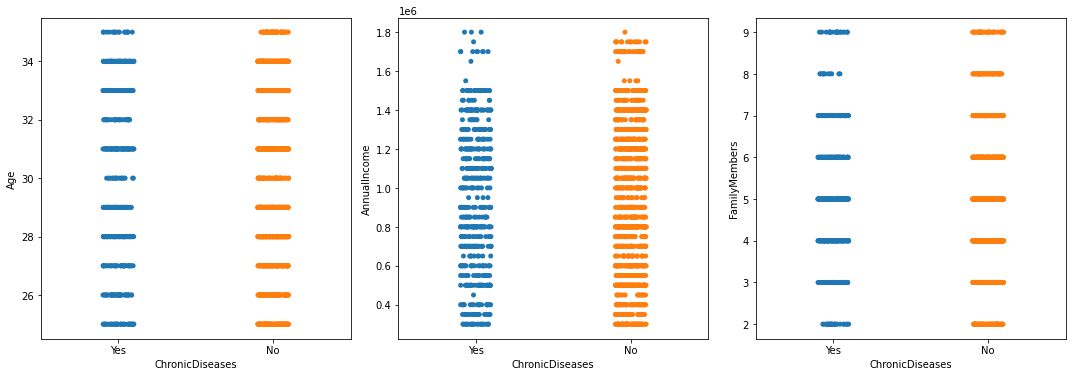

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='ChronicDiseases', y=numerical[i])
  plt.tight_layout()

Grafik di atas menyatakan variabel terhadap historical client yang memiliki chronic disease dengan variabel Numerical (Age, Annual Income, Family Member). Hasil yang dapat disimpulkan yaitu historical client dengan chronic disease yg cenderung memiliki travel insurance kebanyakan berada pada umur > 26 tahun dan yang terbanyak memiliki annual income berada pada kisaran >= 1.4 serta kebanyakan lebih dari 2 orang anggota keluarga. 

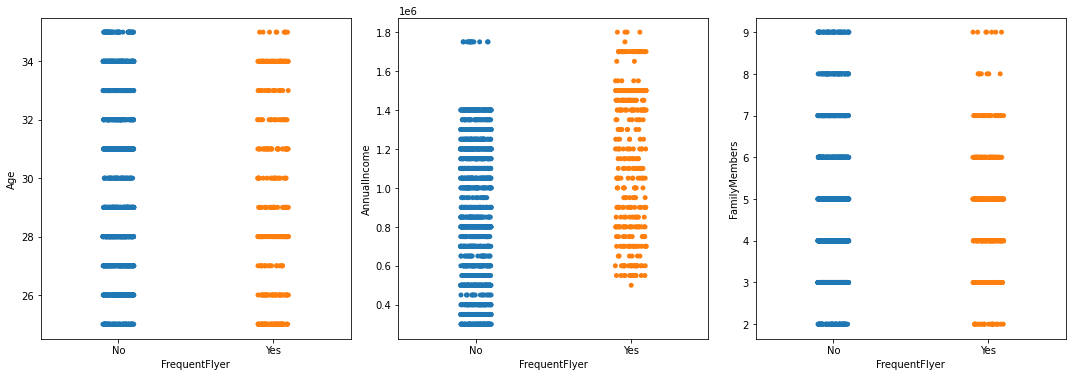

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='FrequentFlyer', y=numerical[i])
  plt.tight_layout()

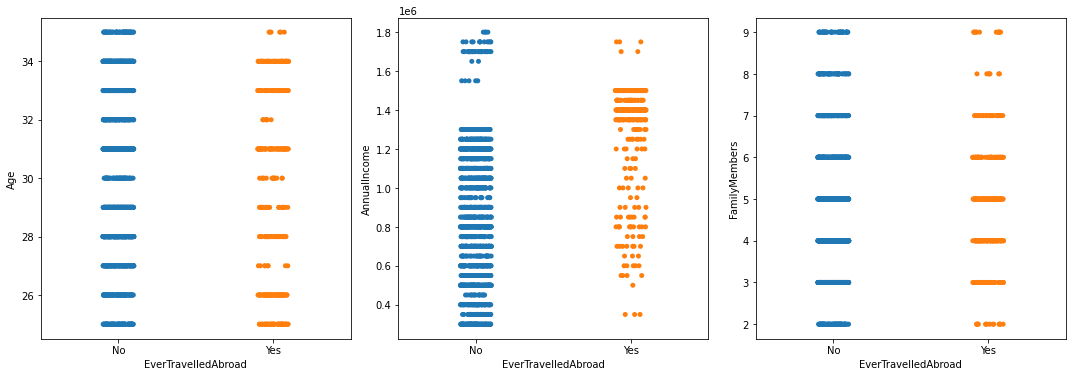

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='EverTravelledAbroad', y=numerical[i])
  plt.tight_layout()

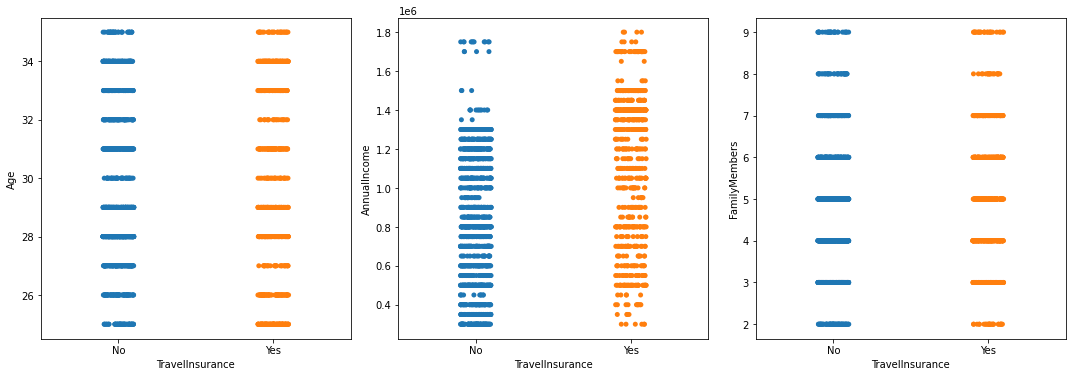

In [ ]:


fig = plt.figure(figsize=(15,15))
for i in range(0, len(numerical)):
  ax = fig.add_subplot(3,3,i+1)
  sns.stripplot(ax=ax, data=df, x='TravelInsurance', y=numerical[i])
  plt.tight_layout()

#Business Insight

In [ ]:
df["TravelInsurance"] = df["TravelInsurance"].map({"No" : 0, "Yes" : 1})
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0


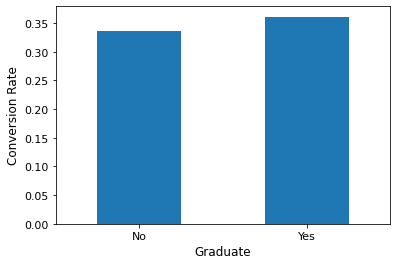

In [ ]:
df.groupby('GraduateOrNot')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Graduate', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfgrad = df.groupby('GraduateOrNot')['TravelInsurance'].mean()
dfgrad

GraduateOrNot
No     0.335593
Yes    0.361111
Name: TravelInsurance, dtype: float64

Pengaruh Pendidikan (Graduate) terhadap conversion rate:

- Pengaruh Pendidikan (Graduate) terhadap conversion rate ini tergolong rendah, dapat dilihat bahwa conversion rate antara Graduate dan Non-Graduate ini terlihat cukup identik dengan Graduate sedikit lebih besar (0.361 & 0.335). Hal ini mungkin terjadi karena Graduate tidak melihat adannya nilai lebih dari pembelian produk Travel Insurance atau tidak begitu memahami benefit yang ada dari produk travel insurance ini.

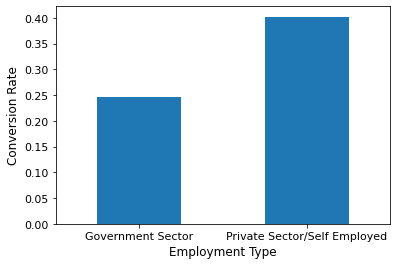

In [ ]:
df.groupby('Employment Type')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfe = df.groupby('Employment Type')['TravelInsurance'].mean()
dfe

Employment Type
Government Sector               0.245614
Private Sector/Self Employed    0.402258
Name: TravelInsurance, dtype: float64

Pengaruh Pekerjaan terhadap conversion rate:

- Dapat dilihat bahwa Conversion rate yang lebih tinggi dalam mengonversi pelanggan dari sektor swasta (0.40) dibandingkan dengan sektor pemerintah (0.24). Hal ini mungkin terjadi karena karyawan di sektor swasta mungkin memiliki kebutuhan yang lebih besar akan asuransi perjalanan, karena sifat pekerjaan atau kebutuhan perjalanan mereka.

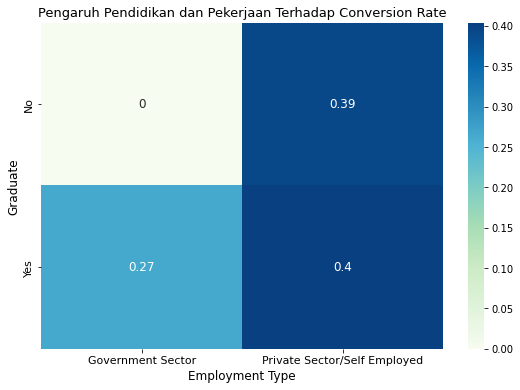

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(pd.pivot_table(df,index="GraduateOrNot",columns="Employment Type",values="TravelInsurance",aggfunc='mean'),annot=True,fmt=".2g",cmap='GnBu',annot_kws={"size": 12})
plt.title('Pengaruh Pendidikan dan Pekerjaan Terhadap Conversion Rate',fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=90, fontsize=11)
plt.ylabel('Graduate', fontsize=12)
plt.xlabel('Employment Type', fontsize=12)

plt.show()

Dari Heatmap diatas dapat dilihat bahwa Graduate yang bekerja di sektor swasta memiliki conversion rate 40% atau 1.48x lebih besar dibandingkan graduate yang bekerja di sektor pemerintahan. Ini menandakan bahwa pekerjaan di sektor swasta sangat membutuhkan asuransi perjalanan, baik bagi Graduate atau Non-Graduate.

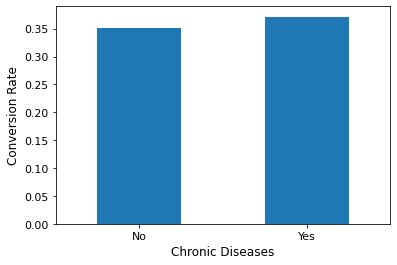

In [ ]:
df.groupby('ChronicDiseases')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Chronic Diseases', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfcd = df.groupby('ChronicDiseases')['TravelInsurance'].mean()
dfcd

ChronicDiseases
No     0.351916
Yes    0.371377
Name: TravelInsurance, dtype: float64

Pengaruh Chronic Diseases terhadap conversion rate:

- Pengaruh Chronic Diseases terhadap conversion rate ini tergolong rendah dan memiliki pola yang sama dengan pengaruh pendidikan (Graduate Or Not) terhadap conversion rate, dapat dilihat bahwa conversion rate antara Yes dan No dari Chronic Diseases ini terlihat cukup identik dengan Yes sedikit lebih besar (0.371 & 0.351). Hal ini mungkin terjadi karena Travel Insurance yang ditawarkan tidak begitu relevan terhadap pelaku perjalanan dengan Chronic Diseases seperti perlindungan untuk keadaan darurat medis atau evakuasi.

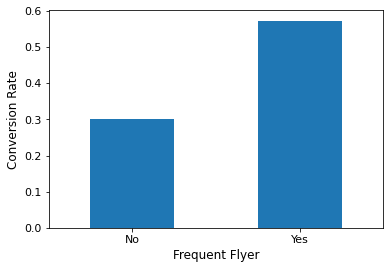

In [ ]:
df.groupby('FrequentFlyer')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Frequent Flyer', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfff = df.groupby('FrequentFlyer')['TravelInsurance'].mean()
dfff

FrequentFlyer
No     0.300000
Yes    0.573141
Name: TravelInsurance, dtype: float64

Pengaruh Frequent Flyers memiliki conversion rate yang tinggi, dimana Yes: 0.57 dan No: 0.3. Hal ini dapat terjadi karena frequent flyer mungkin memiliki kebutuhan atau kebutuhan yang lebih besar akan asuransi perjalanan, karena sifat kebiasaan perjalanan mereka. Selain itu Travel Insurance yang ditawarkan ini mungkin memiliki opsi perlindungan yang sangat relevan dengan frequent flyer, seperti perlindungan untuk multi-perjalanan, perlindungan medis, atau perlindungan untuk penundaan atau pembatalan penerbangan.

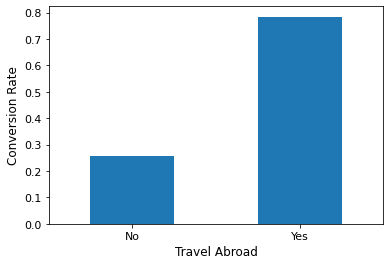

In [ ]:
df.groupby('EverTravelledAbroad')['TravelInsurance'].mean().plot(kind = 'bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Travel Abroad', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
dfta = df.groupby('EverTravelledAbroad')['TravelInsurance'].mean()
dfta

EverTravelledAbroad
No     0.256378
Yes    0.784211
Name: TravelInsurance, dtype: float64

Pengaruh Ever Travelled Abroad memiliki conversion rate yang tinggi, dimana Yes: 0.78 dan No: 0.25. Hal ini dapat terjadi karena pelanggan yang pernah bepergian ke luar negeri mungkin lebih mengetahui potensi risiko dan kesulitan yang terkait dengan perjalanan ke luar negeri. Selain itu Travel Insurance yang ditawarkan ini mungkin memiliki opsi perlindungan yang sangat relevan dengan frequent flyer, seperti perlindungan untuk multi-perjalanan, perlindungan medis, atau perlindungan untuk penundaan atau pembatalan penerbangan.

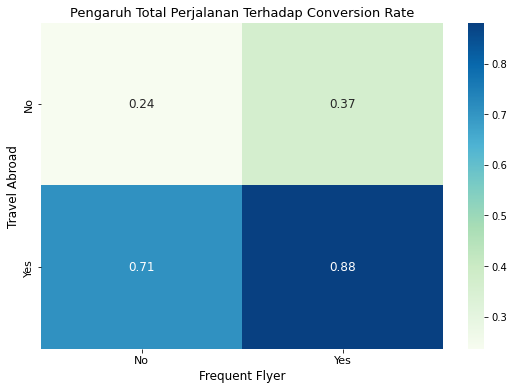

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(pd.pivot_table(df,index="EverTravelledAbroad",columns="FrequentFlyer",values="TravelInsurance",aggfunc='mean'),annot=True,fmt=".2g",cmap='GnBu',annot_kws={"size": 12})
plt.title('Pengaruh Total Perjalanan Terhadap Conversion Rate',fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=90, fontsize=11)
plt.ylabel('Travel Abroad', fontsize=12)
plt.xlabel('Frequent Flyer', fontsize=12)

plt.show()

Dari Heatmap diatas dapat dilihat bahwa Frequent Flyers yang pernah berpergian keluar negeri memiliki conversion rate 88% atau 3.67x lebih besar dibandingkan yang bukan frequent flyer dan tidak pernah pergi keluar negeri. Selain itu, persentase pembelian travel Insurance para pelaku perjalanan yang pernah berpergian ke luar negeri ini juga cukup besar walaupun bukan frequent flyer. Ini menandakan bahwa bagi pelaku perjalanan yang pernah keluar negeri, membeli Travel Insurance merupakan salah satu hal yang penting untuk dilakukan.

In [ ]:
age_cut = []
for x in df["Age"]:
    if x <27 :
        age_cut.append("23-26")
    elif x < 30 :
        age_cut.append("27-29")
    elif x < 33 :
        age_cut.append("30-32")
    else:
        age_cut.append("32+")
df['age_cut'] = age_cut

In [ ]:
df.groupby('age_cut')['TravelInsurance'].mean()

age_cut
23-26    0.564626
27-29    0.220748
30-32    0.312821
32+      0.504219
Name: TravelInsurance, dtype: float64

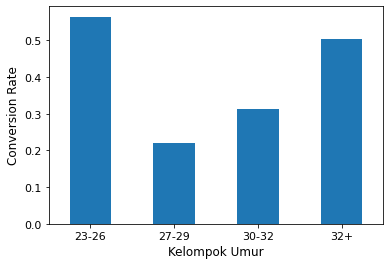

In [ ]:
df.groupby('age_cut')['TravelInsurance'].mean().plot(kind='bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Kelompok Umur', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

In [ ]:
df.groupby('age_cut').agg({'TravelInsurance':['mean',len]})

TravelInsurance     
                   mean  len
age_cut                     
23-26          0.564626  294
27-29          0.220748  829
30-32          0.312821  390
32+            0.504219  474

- Umur 23-26 memiliki conversion rate tertinggi, disusul kelompok umur 32+ dengan conversion rate diatas 0.5
- Umur 27-29 memiliki rentang conversion rate paling rendah diantara kelompok umur lainnya.

In [ ]:
income_cut = []
for x in df['AnnualIncome']:
    if x < 500001:
        income_cut.append('0-500000')
    elif x <750001:
        income_cut.append('500000-750000')
    elif x <1000001:
        income_cut.append('750000-1000000')
    elif x <1500001:
        income_cut.append('1000000-1500000')
    else:
        income_cut.append('1500000+')
        
df['income_cut'] = income_cut

In [ ]:
order = ['0-500000', '500000-750000', '750000-1000000', '1000000-1500000', '1500000+']
df.groupby('income_cut').agg({'TravelInsurance':['mean',len]}).loc[order]

TravelInsurance     
                           mean  len
income_cut                          
0-500000               0.163934  366
500000-750000          0.260163  369
750000-1000000         0.263158  361
1000000-1500000        0.496377  828
1500000+               0.761905   63

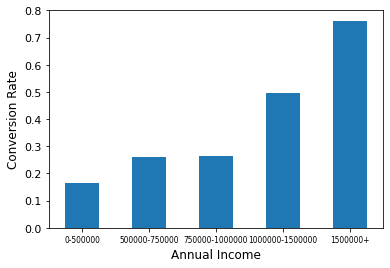

In [ ]:
df.groupby('income_cut')['TravelInsurance'].mean().loc[order].plot(kind='bar')
plt.xticks(rotation=0, fontsize=7.5)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Conversion rate Akan semakin besar seiring dengan besarnya pendapatan tahunan.

In [ ]:
family_cut = []
for x in df["FamilyMembers"]:
    if x < 3 :
        family_cut.append("1-2")
    elif x <5 :
        family_cut.append("3-4")
    elif x <7 :
        family_cut.append("5-6")
    elif x <9 :
        family_cut.append("7-8")
    else :
        family_cut.append("9+")


df['family_cut'] = family_cut

In [ ]:
orders_fam = ['1-2', '3-4', '5-6', '7-8', '9+']
df.groupby('family_cut').agg({'TravelInsurance':['mean',len]}).loc[orders_fam]

TravelInsurance     
                      mean  len
family_cut                     
1-2               0.290323   93
3-4               0.334467  882
5-6               0.361111  720
7-8               0.430380  237
9+                0.472727   55

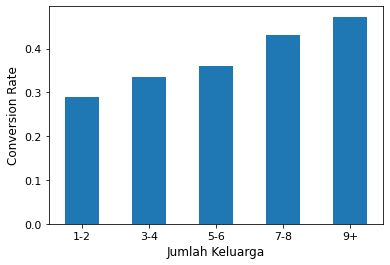

In [ ]:
df.groupby('family_cut')['TravelInsurance'].mean().loc[orders_fam].plot(kind='bar')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Jumlah Keluarga', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Conversion rate Akan semakin besar seiring dengan banyaknya jumlah keluarga.

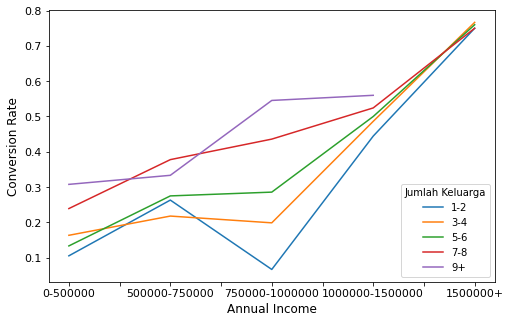

In [ ]:
pd.pivot_table(df,index="income_cut",columns="family_cut",values="TravelInsurance",
               aggfunc='mean').loc[order].plot(figsize=(8,5))
plt.legend(loc='lower right', title='Jumlah Keluarga')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Secara Umum, tren pembelian Travel Insurance meningkat seiring dengan besarnya pendapatan tahunan di semua kelompok jumlah keluarga dengan titik optimum conversion rate pada annual income 1500000+.

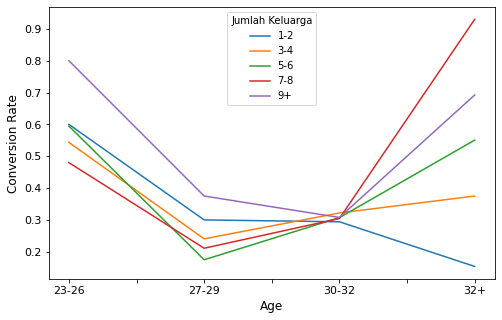

In [ ]:
pd.pivot_table(df,index="age_cut",columns="family_cut",values="TravelInsurance",
               aggfunc='mean').plot(figsize=(8,5))
plt.legend(loc='upper center', title='Jumlah Keluarga')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

Secara Umum, tren pembelian Travel Insurance menurun pada umur 23-26, yang kemudian pada 27-29 akan bergerak naik, terkecuali untuk pelaku perjalanan dengan jumlah keluarga 1-2 orang. Sehingga titik optimumnya ketika pelaku perjalanan berumur 32+.

In [ ]:
df["df_fta"] = df[["FrequentFlyer", "EverTravelledAbroad"]].apply("-".join, axis=1)

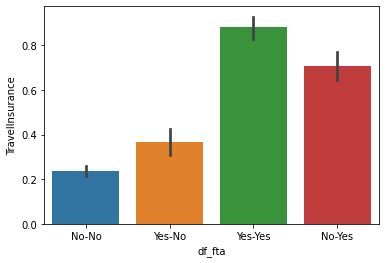

In [ ]:
sns.barplot(x = 'df_fta' ,y = 'TravelInsurance', data=df)

df_fta merupakan penggabungan FrequentFlyer - EverTravelledAbroad.

dari hasil diatas dapat dilihat bahwa customer yang membeli travel insurance kebanyakan merupakan orang yang sering melakukan perjalanan dan pernah melakukan perjalanan ke luar negeri, dan dapat dilihat orang yang pernah melakukan perjalanan ke luar negeri lebih cenderung berpengaruh dalam pembelian travel insurance.

**Rekomendasi Bisnis untuk Perusahaan Tour and Travel:**

Perusahaan dapat memfokuskan pada kategori-kategori dibawah ini untuk menarik klien agar lebih banyak yang tertarik menggunakan paket asuransi baru yang meliputi perlindungan COVID dengan menggunakan strategi yaitu: <br>

1. Perusahaan dapat memfokuskan pada klien yang sering berpergian ke luar kota dengan ketertarikan kebutuhan asuransi paling banyak dibandingkan karakter yang lain. <br>
2. Memfokuskan promosi ke user dengan rentang umur di atas 26 tahun dan yang memiliki riwayat penyakit kronis (chronic disease) serta pernah melakukan perjalanan ke luar negeri (ever travelled abroad). <br>
3. Berdasarkan data historis, di luar karakteristik klien, kedepannya prospecting dapat dilakukan ke calon user yang memiliki annual income di atas 1.3 million dan calon user yang berprofesi di bidang private sector dikarenakan sektor swasta mungkin memiliki kebutuhan yang lebih besar akan asuransi perjalanan, karena sifat pekerjaan atau kebutuhan perjalanan mereka.


# Data Cleansing

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,age_cut,income_cut,family_cut,df_fta
0,31,Government Sector,Yes,400000,6,Yes,No,No,0,30-32,0-500000,5-6,No-No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0,30-32,1000000-1500000,7-8,No-No
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1,32+,0-500000,3-4,No-No
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0,27-29,500000-750000,3-4,No-No
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0,27-29,500000-750000,7-8,Yes-No


In [ ]:
df['Employment Type'].describe()

count                             1987
unique                               2
top       Private Sector/Self Employed
freq                              1417
Name: Employment Type, dtype: object